In [64]:
#import train data and test data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split

movie_data = pd.read_csv('movie_metadata.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


In [65]:
movie_data['profit'] = movie_data['gross'] - movie_data['budget']
movie_data['profit_binary'] = np.where(movie_data['profit'] > 0, 1, 0)


In [66]:
movie_data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes', 'profit',
       'profit_binary'],
      dtype='object')

In [67]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(movie_data, test_size=0.2, random_state=42)

# Save the training and testing data as CSV files
train_data.to_csv('movie_train.csv', index=False)
test_data.to_csv('movie_test.csv', index=False)

movie_train = pd.read_csv('movie_train.csv')
movie_test =pd.read_csv('movie_test.csv')

In [68]:
logit_model = sm.logit(formula = 'profit_binary~duration+director_facebook_likes+actor_3_facebook_likes+actor_1_facebook_likes+cast_total_facebook_likes+facenumber_in_poster+title_year+actor_2_facebook_likes+aspect_ratio+movie_facebook_likes', data = movie_train).fit() #Developing logistic regression model
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.652394
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          profit_binary   No. Observations:                 3694
Model:                          Logit   Df Residuals:                     3683
Method:                           MLE   Df Model:                           10
Date:                Mon, 06 Mar 2023   Pseudo R-squ.:                 0.04868
Time:                        00:01:07   Log-Likelihood:                -2409.9
converged:                       True   LL-Null:                       -2533.3
Covariance Type:            nonrobust   LLR p-value:                 2.785e-47
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    23.6844      5.959      3.974      0.000      12.004      35.365
duration                     -0.0005      0.002     -0.306      0.760      -0.004       0.003
director_facebook_likes    3.142e-05   1.28e-05      2.451      0.014    6.29e-06    5.65e-05
actor_3_facebook_likes       -0.0004   6.51e-05     -5.549      0.000      -0.000      -0.000
actor_1_facebook_likes       -0.0003   4.57e-05     -7.381      0.000      -0.000      -0.000
cast_total_facebook_likes     0.0003   4.54e-05      7.468      0.000       0.000       0.000
facenumber_in_poster         -0.0040      0.017     -0.235      0.814      -0.038       0.029
title_year                   -0.0120      0.003     -4.004      0.000      -0.018      -0.006
actor_2_facebook_likes       -0.0003   4.76e-05     -6.984      0.000      -0.000      -0.000
aspect_ratio                 -0.1970      0.098     -2.004      0.045      -0.390      -0.004
movie_facebook_likes       2.335e-05   2.51e-06      9.313      0.000    1.84e-05    2.83e-05
=============================================================================================
"""

In [69]:
train.columns

Index(['director_name', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes',
       'gross', 'actor_1_name', 'movie_title', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'language', 'country', 'content_rating', 'budget',
       'title_year', 'actor_2_facebook_likes', 'aspect_ratio', 'profit',
       'gross_bin', 'action', 'adventure', 'animation', 'biography', 'comedy',
       'crime', 'documentary', 'drama', 'family', 'fantasy', 'history',
       'horror', 'music', 'musical', 'mystery', 'romance', 'sci_fi', 'sport',
       'thriller', 'war', 'western', 'director_high', 'director_low',
       'actor_1_high', 'actor_1_low', 'actor_2_high', 'actor_2_low',
       'actor_3_high', 'actor_3_low', 'is_english', 'profit_binary'],
      dtype='object')

In [70]:
y_pred = logit_model.predict(movie_test)

# convert predicted probabilities to class labels (0 or 1)
y_pred_class = np.where(y_pred > 0.5, 1, 0)

# compare predicted class labels with actual class labels in the test set
accuracy = np.mean(y_pred_class == movie_test['profit_binary'])
print('Accuracy:', accuracy)


Accuracy: 0.6323092170465807


In [71]:
# remove NaN from y-pred and  remove same rows from movie_test
movie_test = movie_test[~np.isnan(y_pred)]
y_pred = y_pred[~np.isnan(y_pred)]




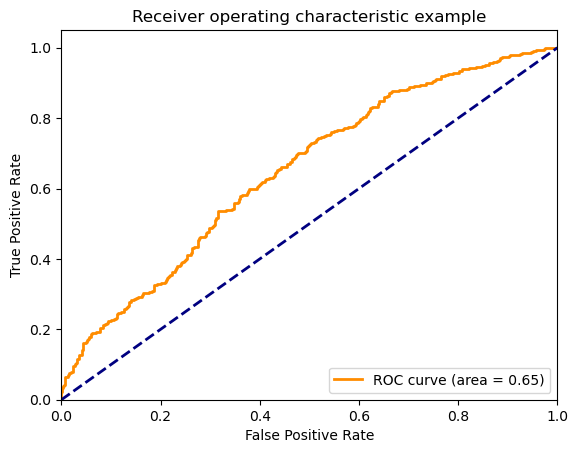

In [72]:
# ##plot ROC curve
# from sklearn.metrics import roc_curve
# fpr, tpr, thresholds = roc_curve(test['profit_binary'], test['pred'])
# plt.plot(fpr, tpr)
# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.show()

#plot ROC
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(movie_test['profit_binary'], y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


In [75]:
#Function to compute confusion matrix and prediction accuracy on test data
def confusion_matrix_test(data,actual_values,model,cutoff=0.5):
#Predict the values using the Logit model
    pred_values = model.predict(data)
# Specify the bins
    bins=np.array([0,cutoff,1])
#Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))

In [77]:
#Function to compute confusion matrix and prediction accuracy on test/train data
from sklearn.metrics import auc


def confusion_matrix_data(data,actual_values,model,cutoff=0.5):
#Predict the values using the Logit model
    pred_values = model.predict(data)
# Specify the bins
    bins=np.array([0,cutoff,1])
#Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
# Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    fnr = (cm[1,0])/(cm[1,0]+cm[1,1])
    precision = (cm[1,1])/(cm[0,1]+cm[1,1])
    fpr = (cm[0,1])/(cm[0,0]+cm[0,1])
    tpr = (cm[1,1])/(cm[1,0]+cm[1,1])
    fpr_roc, tpr_roc, auc_thresholds = roc_curve(actual_values, pred_values)
    auc_value = (auc(fpr_roc, tpr_roc))# AUC of ROC
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    print("Precision = {:.1%}".format(precision))
    print("TPR or Recall = {:.1%}".format(tpr))
    print("FNR = {:.1%}".format(fnr))
    print("FPR = {:.1%}".format(fpr))
    print("ROC-AUC = {:.1%}".format(auc_value))


Classification accuracy = 59.8%
Precision = 57.8%
TPR or Recall = 32.5%
FNR = 67.5%
FPR = 18.7%
ROC-AUC = 65.1%


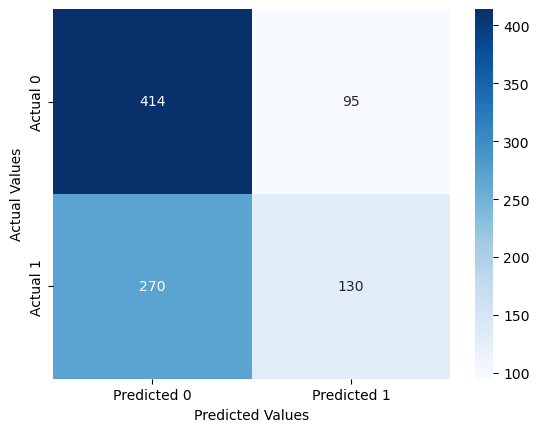

In [78]:
confusion_matrix_data(movie_test,movie_test.profit_binary,logit_model,0.5)